In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lr
import librosa.display
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank

In [31]:
def audio_plot(audio_file):
    audio, Fs = lr.load(audio_file) #Fs is the sampling rate

    #print(audio.size/Fs) #gives the time duration of the audio signal
    #print(Fs)

    Ts = 1.0/Fs #Time step of a single sample
    t = np.arange(0, len(audio)/Fs, Ts) #time vector

    N = len(audio) #total number of samples
    #k = np.arange(N)
    #T = N/Fs #time duration of the audio signal
    #f = k/T #since I need total 'k' samples in the time duration of the audio
    f = np.fft.fftfreq(N, d=Ts)

    fft_audio = np.fft.fft(audio)/N

    fig, ax = plt.subplots(3, 1, figsize=(12, 20))
    ax[0].plot(t, audio)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    
    ax[1].plot(f/1000, abs(fft_audio)) 
    ax[1].set_xlabel('Freq (KHz)')
    ax[1].set_ylabel('|Y(freq)|')
    
    
    n_fft = 4096
    aud_stft = np.abs(lr.stft(aud, n_fft=n_fft, win_length=int(n_fft)))
    fig = lr.display.specshow(aud_stft, y_axis='log', x_axis='time', cmap='hot')
    ax[2] = fig

In [ ]:
n_class = 9
n_aud_files = 67

files = np.empty([n_class, n_aud_files], dtype=object)

data_folder = glob.glob("../Read_Up/*")
#print(data_folder)

for (i, session) in zip(range(n_class), data_folder):
    for (j, aud_file) in zip(range(n_aud_files), glob.glob("%s/*"%session)):
        files[i][j] = aud_file
                           

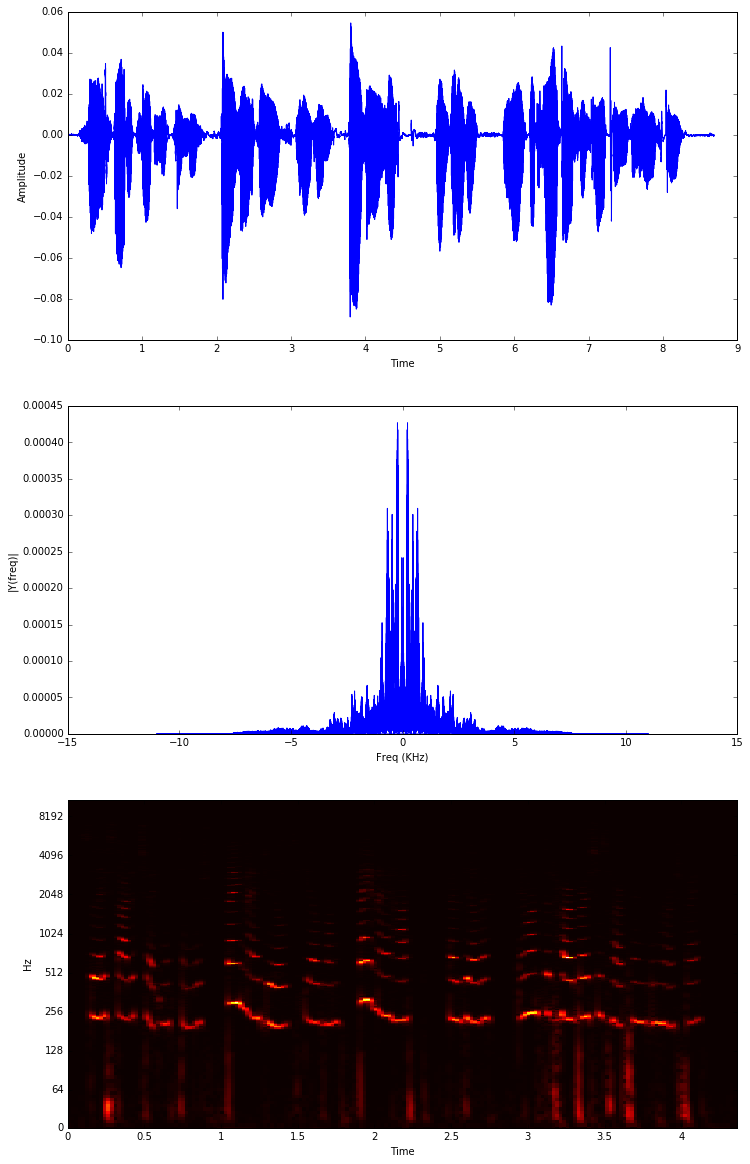

In [32]:
audio_plot('../Read_Up/IDR1/06.wav')

In [ ]:
audio, Fs = lr.load('../Read_Up/IDR1/01.wav')
mfcc_feat = mfcc(audio, Fs)
d_mfcc_feat = delta(mfcc_feat, 2)
fbank_feat = logfbank(audio, Fs)

In [ ]:
audio_files = np.ndarray((n_class, n_aud_files))
for i in range(n_class):
    print("Class: %d"%i)
    for j in range(n_aud_files):
        aud, Fs = lr.load(files[i][j])
        np.append(audio_files[i][j], aud)
        print("File num: %d"%j)
        

In [ ]:
print(audio_files)

22050
(191558,)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


(0, 0.004)

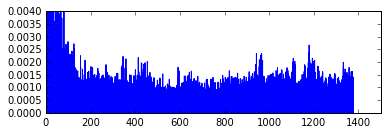

In [83]:
audio, Fs = lr.load('../Read_Up/IDR1/06.wav')

print(Fs)

Ts = 1.0/Fs #Time step of a single sample
t = np.arange(0, len(audio)/Fs, Ts) #time vector
N = len(audio) #total number of samples

f = np.fft.fftfreq(N, d=Ts)
cep_audio = np.fft.ifft(np.log10(np.abs(np.fft.fft(audio)/N))).real
print(cep_audio.shape)
que = 1125*np.log10(1+(f/700))

fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(que, cep_audio)
ax0.set_xlim(0, 1500)
ax0.set_ylim(0, 0.004)
